In [1]:
%matplotlib inline
%load_ext rpy2.ipython
import matplotlib.pyplot as plt
from matplotlib.mlab import csv2rec
import numpy as np
from numpy import mean, sqrt, std, fabs

# stats60 specific

figsize = (8,8)

# Simple linear regression 

The first type of model, which we will spend a lot of time on, is the *simple linear regresssion model*. One simple way to think of it
is via scatter plots. Below are [heights](http://www.stat.cmu.edu/~roeder/stat707/=data/=data/data/Rlibraries/alr3/html/heights.html) of mothers and daughters collected 
by Karl Pearson in the late 19th century. 

In [4]:
%%R -o M,D
library(alr3)
data(heights)
M = heights$Mheight
D = heights$Dheight

/Users/jonathantaylor/anaconda/envs/py27/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: car

  res = super(Function, self).__call__(*new_args, **new_kwargs)


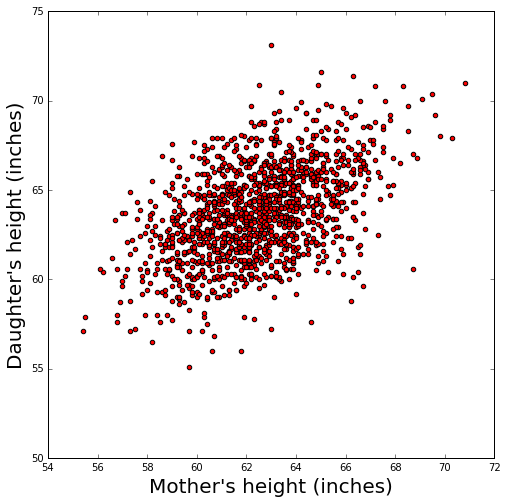

In [5]:
heights_fig = plt.figure(figsize=figsize)
axes = heights_fig.gca()
axes.scatter(M, D, c='red')
axes.set_xlabel("Mother's height (inches)", size=20)
axes.set_ylabel("Daughter's height (inches)", size=20)


The regression model puts a line through this scatter plot in an *optimal* fashion.



In [6]:
%%R -o slope,intercept
parameters = lm(D~M)$coef
print(parameters)
intercept = parameters[1]
slope = parameters[2]

(Intercept)           M 
  29.917437    0.541747 


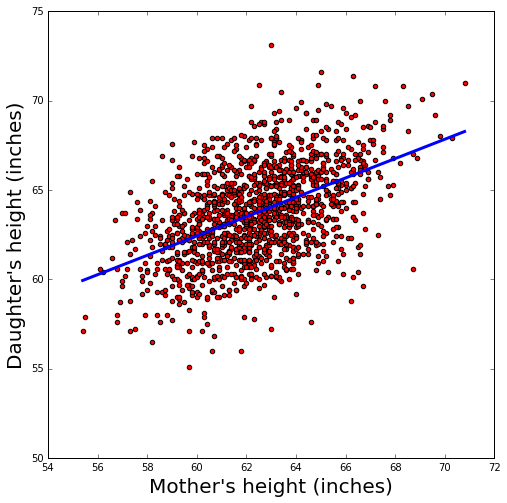

In [7]:
axes.plot([M.min(), M.max()], [intercept + slope * M.min(), intercept + slope * M.max()],
          linewidth=3)
heights_fig


### Simple linear regression model

 *  *Simple linear* regression is the case when there is only one predictor:
   $$
   f({\tt Mother}) = \beta_0 + \beta_1  \cdot {\tt Mother}.$$

* Let $Y_i$ be the height of the $i$-th daughter in the sample, $X_i$ be the height of the $i$-th mother.

* Model:
   $$
   Y_i = \underbrace{\beta_0 + \beta_1 X_i}_{\text{regression equation}} + \underbrace{\varepsilon_i}_{\text{error}}$$
   where $\varepsilon_i \sim N(0, \sigma^2)$ are independent.

* This specifies a *distribution* for the $Y$'s given the $X$'s, i.e.
   it is a *statistical model*.


## Example: wages vs. experience


In this example, we'll look at the output of *lm* for the wage
data and verify that some of the equations we present for the 
least squares solutions agree with the output.
The data was compiled from a study in econometrics [Learning about Heterogeneity in Returns to Schooling]( http://www.econ.queensu.ca/jae/2004-v19.7/koop-tobias/readme.kt.txt).


In [8]:
%%R
url = 'http://stats191.stanford.edu/data/wage.csv'
wages = read.table(url, sep=',', header=T)
print(head(wages))

  education  logwage
1  16.75000 2.845000
2  15.00000 2.446667
3  10.00000 1.560000
4  12.66667 2.099167
5  15.00000 2.490000
6  15.00000 2.330833


Let's fit the linear regression model.

In [9]:
%%R
wages.lm = lm(logwage ~ education, data=wages)
attach(wages)
print(wages.lm)


Call:
lm(formula = logwage ~ education, data = wages)

Coefficients:
(Intercept)    education  
     1.2392       0.0786  



As in the mother-daughter data, we might want to plot the data and add the regression line.

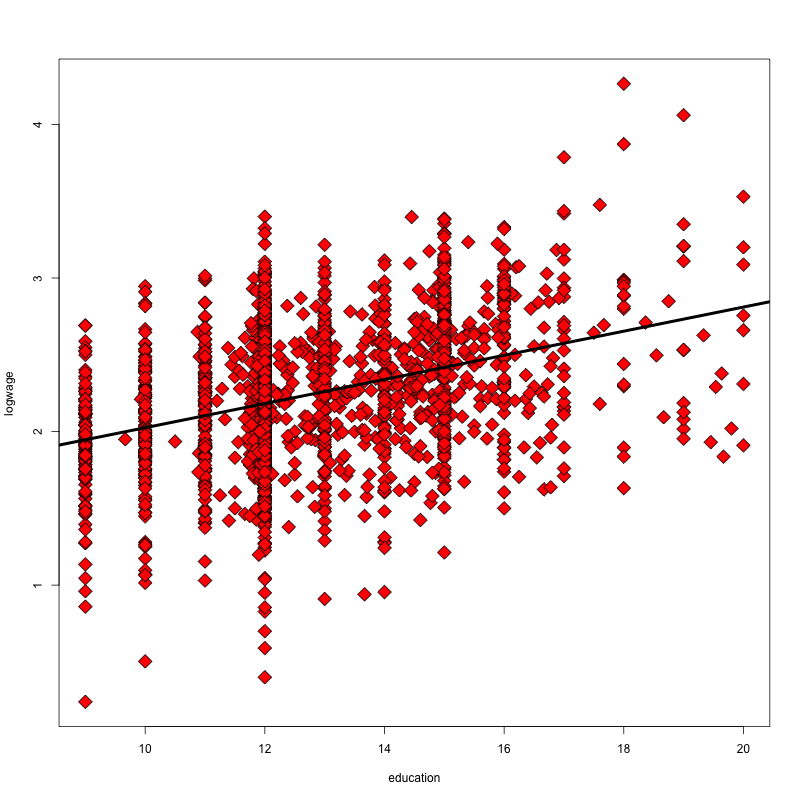

In [10]:
%%R -h 800 -w 800
plot(education, logwage, pch=23, bg='red', cex=2)
abline(wages.lm, lwd=4, col='black')

### Least squares estimators

There are explicit formulae for the least squares estimators, i.e. the minimizers of the error sum of squares.

For the slope, $\hat{\beta}_1$, it can be shown that 
$$
   \widehat{\beta}_1 = \frac{\sum_{i=1}^n(X_i - \overline{X})(Y_i - \overline{Y}
)}{\sum_{i=1}^n (X_i-\overline{X})^2} = \frac{\widehat{Cov}(X,Y)}{\widehat{Var}(
X)}.$$

Knowing the slope estimate, the intercept estimate can be found easily:
$$ \widehat{\beta}_0 = \overline{Y} - \widehat{\beta}_1 \cdot \overline{
X}.$$



### Estimate of $\sigma^2$

There is one final quantity needed to estimate all of our parameters in our (statistical) model for the scatterplot. This is $\sigma^2$,
the variance of the random variation within each slice (the regression model assumes this variance is constant within each slice...).

The estimate most commonly used is
$$
\hat{\sigma}^2 = \frac{1}{n-2} \sum_{i=1}^n (Y_i - \hat{\beta}_0 - \hat{\beta}_1 X_i)^2 = \frac{SSE}{n-2} = MSE
$$

Above, note the practice of replacing the quantity $SSE(\hat{\beta}_0,\hat{\beta}_1)$, i.e. the minimum of this function, with just $SSE$.

The term *MSE* above refers to mean squared error: a sum of squares divided by what we call its *degrees of freedom*. The degrees of freedom
of *SSE*, the *error sum of squares* is therefore $n-2$. Remember this $n-2$ corresponded to $\perp$ in the picture above...

Using some statistical calculations that we will not dwell on, if our simple linear regression model is correct, then we can see that
$$
\frac{\hat{\sigma}^2}{\sigma^2} \sim \frac{\chi^2_{n-2}}{n-2}
$$
where the right hand side denotes a *chi-squared* distribution with $n-2$ degrees of freedom.

#### Wages example

In [11]:
%%R
sigma.hat = sqrt(sum(resid(wages.lm)^2) / wages.lm$df.resid)
sigma.hat

[1] 0.4037828


The summary from *R* also contains this estimate of $\sigma$:

In [12]:
%%R
summary(wages.lm)


Call:
lm(formula = logwage ~ education, data = wages)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.78239 -0.25265  0.01636  0.27965  1.61101 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.239194   0.054974   22.54   <2e-16 ***
education   0.078600   0.004262   18.44   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4038 on 2176 degrees of freedom
Multiple R-squared:  0.1351,	Adjusted R-squared:  0.1347 
F-statistic:   340 on 1 and 2176 DF,  p-value: < 2.2e-16



# Inference for the simple linear regression model

* Recall our model $$
   Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i,$$
   errors $\varepsilon_i$ are independent $N(0, \sigma^2)$.
   
* In our heights example, we might want to now if there
   really is a linear association between ${\tt Daughter}=Y$
   and ${\tt Mother}=X$. This can be answered with a *hypothesis test* of the null hypothesis $H_0:\beta_1=0$.
   This assumes the model above is correct, but that $\beta_1=0$.
   
* Alternatively, we might want to have a range of values that we can be fairly certain $\beta_1$ lies within.
This is a *confidence interval* for $\beta_1$.

### Setup for inference

* It turns out that
$$
   \widehat{\beta}_1 \sim N\left(\beta_1, \frac{\sigma^2}{\sum_{i=1}^n(X_i-\overline{X})^2}\right).$$

* Therefore, $$\frac{\widehat{\beta}_1 - \beta_1}{\sigma \sqrt{\frac{1}{\sum_{i=1}^n(X_i-\overline{X})^2}}} \sim N(\
0,1).$$

* The other quantity we need is the *standard error* or SE of $\hat{\beta}_1$. This is
obtained from estimating the variance of $\widehat{\beta}_1$, which, in this case means simply
plugging in our estimate of $\sigma$, yielding
$$
   SE(\widehat{\beta}_1) = \widehat{\sigma} \sqrt{\frac{1}{\sum_{i=1}^n(X_i-\overline{X})^2}} \qquad 
   \text{independent of $\widehat{\beta}_1$}$$


### Testing $H_0:\beta_1=\beta_1^0$

* Suppose we want to test that $\beta_1$ is some pre-specified
   value, $\beta_1^0$ (this is often 0: i.e. is there a linear association)

* Under $H_0:\beta_1=\beta_1^0$
   $$\frac{\widehat{\beta}_1 - \beta^0_1}{\widehat{\sigma} \sqrt{\frac{1}{\sum_{i=1}^n(X_i-\overline{X})^2}}}
   = \frac{\widehat{\beta}_1 - \beta^0_1}{ \frac{\widehat{\sigma}}{\sigma}\cdot \sigma \sqrt{\frac{1}{
\sum_{i=1}^n(X_i-\overline{X})^2}}} \sim t_{n-2}.$$


* Reject $H_0:\beta_1=\beta_1^0$ if $|T| > t_{n-2, 1-\alpha/2}$.
   

#### Wage example

Let's perform this test for the wage data.

In [13]:
%%R
beta.1.hat = wages.lm$coef["education"]
SE.beta.1.hat = (sigma.hat * sqrt(1 / sum((education - mean(education))^2)))
Tstat = beta.1.hat / SE.beta.1.hat
data.frame(beta.1.hat, SE.beta.1.hat, Tstat)


          beta.1.hat SE.beta.1.hat    Tstat
education 0.07859951   0.004262471 18.43989


Let's look at the output of the `lm` function again.

In [14]:
%%R
summary(wages.lm)


Call:
lm(formula = logwage ~ education, data = wages)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.78239 -0.25265  0.01636  0.27965  1.61101 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.239194   0.054974   22.54   <2e-16 ***
education   0.078600   0.004262   18.44   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4038 on 2176 degrees of freedom
Multiple R-squared:  0.1351,	Adjusted R-squared:  0.1347 
F-statistic:   340 on 1 and 2176 DF,  p-value: < 2.2e-16



We see that *R* performs this test in the second row of the `Coefficients` table. It is clear that
wages are correlated with education.

### Confidence interval based on Student's $t$ distribution

*   Suppose we have a parameter estimate $\widehat{\theta} \sim N(\theta, {\sigma}_{\theta}^2)$, and standard error $SE(\widehat{\theta})$ such that
   $$
   \frac{\widehat{\theta}-\theta}{SE(\widehat{\theta})} \sim t_{\nu}.$$

* We can find a $(1-\alpha) \cdot 100 \%$ confidence interval by:
   $$
   \widehat{\theta} \pm SE(\widehat{\theta}) \cdot t_{\nu, 1-\alpha/2}.$$
   


### Confidence interval for regression parameters

* Applying the above to the parameter $\beta_1$ yields a confidence interval of the form
$$
   \hat{\beta}_1 \pm SE(\hat{\beta}_1) \cdot t_{n-2, 1-\alpha/2}.$$
   
* We will need to compute $SE(\hat{\beta}_1)$. This can be computed using this formula
   $$
   SE(a_0\hat{\beta}_0 + a_1\hat{\beta}_1) = \hat{\sigma} \sqrt{\frac{a_0^2}{n} + \frac{(a_0\overline{X} - a_1)^2}{\sum_{i=1}^n \left(X_i-\overline{X}\right)^2}}.$$



We also need to find the quantity $t_{n-2,1-\alpha/2}$. This is defined by
$$
\mathbb{P}(T_{n-2} \geq t_{n-2,1-\alpha/2}) = \alpha/2.
$$
In *R*, this is computed by the function `qt`.


In [15]:
%%R
alpha = 0.05
n = length(wages$education)
qt(1-0.5*alpha,n-2)

[1] 1.961055


Not surprisingly, this is close to that of the normal distribution, which is a Student's $t$ with $\infty$ for degrees of freedom.

In [16]:
%%R
qnorm(1-0.5*alpha)

[1] 1.959964


In [17]:
%%R
L = beta.1.hat - qt(0.95, wages.lm$df.resid) * SE.beta.1.hat
U = beta.1.hat + qt(0.95, wages.lm$df.resid) * SE.beta.1.hat
data.frame(L, U)

                   L          U
education 0.07158538 0.08561364


In [18]:
%%R
confint(wages.lm)

                 2.5 %     97.5 %
(Intercept) 1.13138690 1.34700175
education   0.07024057 0.08695845
